# COMP S493F Lab 7

In [1]:
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_CPP_MIN_LOG_LEVEL=2


In this lesson, you'll work on:

- application of dropout to neural networks, and
- application of batch normalization to neural networks.

### Student name: *LO TSZ KIN*

# Backgrounds and utilities

In the preceding lesson, we used weight regularization to mitigate overfitting. This lesson continues the preceding lesson, and attempts to deal with overfitting using some other techniques -- dropout and batch normalization.

This section contains some utility functions for use and some previously examined models for reference in the rest of the lesson.

## Utility code

This function loads the MNIST dataset, prepares the data, and returns portion of the data in a 4-tuple: `X_train`, `y_train`, `X_test`, `y_test`.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist

def load_and_prep_mnist(ratio=0.1):
    keras.utils.set_random_seed(42)
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    if ratio < 1:
        sz_train = int(len(X_train) * ratio)
        sz_test = int(len(X_test) * ratio)
        X_train, y_train = X_train[:sz_train], y_train[:sz_train]
        X_test, y_test = X_test[:sz_test], y_test[:sz_test]
    X_train_out = X_train.astype(float) / 255  # scale to range 0 to 1
    X_test_out = X_test.astype(float) / 255
    X_train_out = X_train_out.reshape(-1, 28*28)  # convert 2D to 1D
    X_test_out = X_test_out.reshape(-1, 28*28)
    y_train_oh = keras.utils.to_categorical(y_train, 10)  # one-hot encode
    y_test_oh = keras.utils.to_categorical(y_test, 10)
    return X_train_out, y_train_oh, X_test_out, y_test_oh

This function retrieves the final results in a training history, i.e. values of "loss", "val_loss", "acc", and "val_acc" in the final epoch.

In [3]:
def history_final_values(history):
    return {k: round(v[-1], 4) for k, v in history.history.items()}

This function plots a training history, including both training and validation results.

In [4]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(history.history["acc"], label="acc")
    plt.plot(history.history["val_acc"], label="val_acc")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

This function compiles and fits a model, and returns the training history. Note that the number of epochs, batch size, ratio of validation split are fixed in this function, and thus in this lesson; in reality; these are hyperparameters to be tuned in the process of model development.

In [5]:
def compile_and_fit_model(model, X_train, y_train):
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam", metrics=["acc"])
    history = model.fit(X_train, y_train, epochs=50, batch_size=256,
                        verbose=0, validation_split=0.2)
    return history

## Previous models

**Model#1** is a simple model that contains 1 hidden layer of 32 ReLU neurons.

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#1 | 1 | 32 | 0.2550 | 0.9283 | No

11490434/11490434 [==============================] - 0s 0us/step
{'loss': 0.0731, 'acc': 0.9862, 'val_loss': 0.255, 'val_acc': 0.9283}


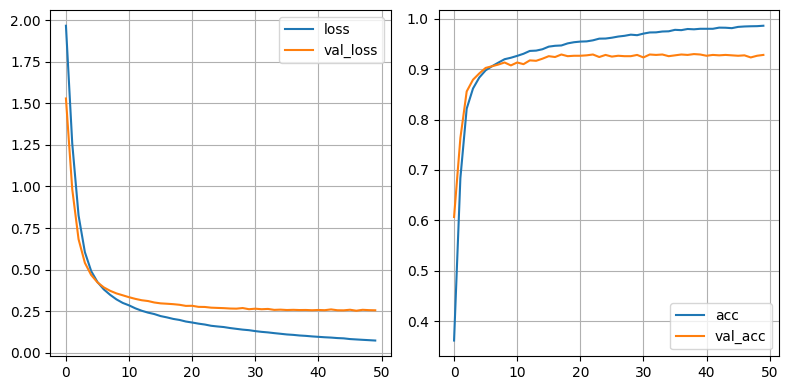

In [ ]:
# Model#1
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

**Model#2** is a complex model with overfitting.

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#2 | 2 | 512 | 0.2423 | 0.9508 | Moderate

{'loss': 0.0002, 'acc': 1.0, 'val_loss': 0.2423, 'val_acc': 0.9508}


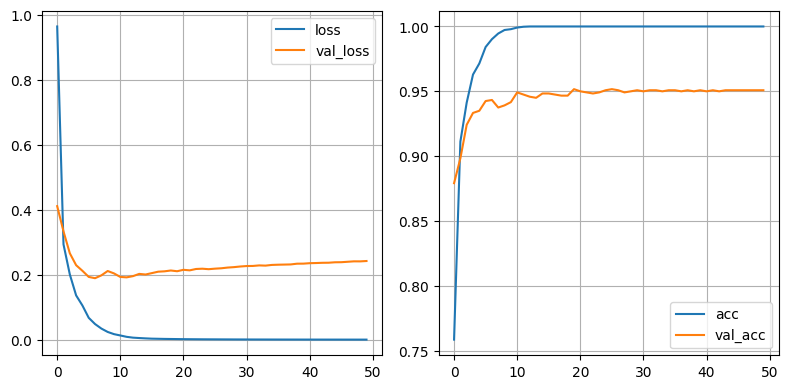

In [ ]:
# Model#2
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

**Model#3** is a regularized (L2 strength 0.000_01) complex model that has no overfitting.

Model | L2 regularization strength | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:
#3 | 0.000_01 | 0.1809 | 0.9517 | No

{'loss': 0.0026, 'acc': 1.0, 'val_loss': 0.1765, 'val_acc': 0.9508}


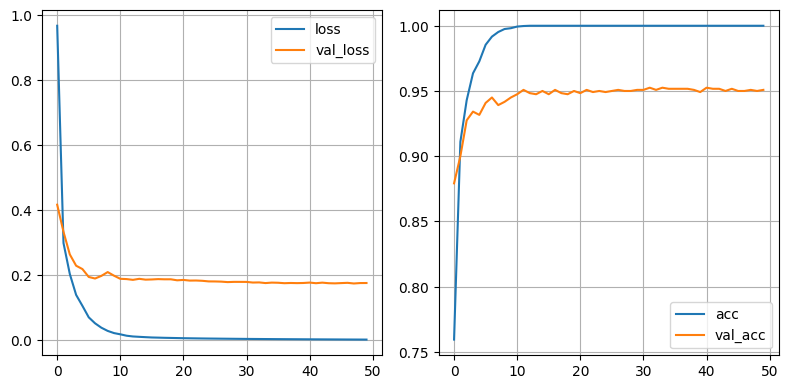

In [ ]:
# Model#3
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(512, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

**Model#4** is a regularized, even more complex model that was accepted in the preceding lesson.

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#4| 2 | 2048 | 0.1422 | 0.9617 | Slight

{'loss': 0.001, 'acc': 1.0, 'val_loss': 0.1392, 'val_acc': 0.9608}


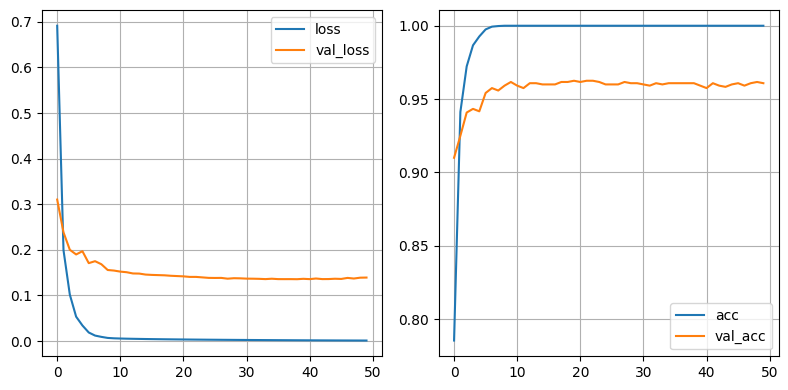

In [ ]:
# Model#4
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(2048, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(2048, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

The model below is identical Model#4, but retrained using both the training set and the validation set combined. Its evaluation result using the text set is also shown.

In [ ]:
# Retrain Model#4 using training set and validation set combined
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(2048, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(2048, activation="relu",
                 activity_regularizer=regularizers.l2(0.000_01)),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["acc"])
history = model.fit(X_train, y_train, epochs=50, batch_size=256,
                    verbose=0) # no validation_split
print(history_final_values(history))

{'loss': 0.0006, 'acc': 1.0}


In [ ]:
print("Evaluation of retrained model",
      model.evaluate(X_test, y_test, verbose=0))

Evaluation of retrained model [0.1623714566230774, 0.9570000171661377]


# Dropout

Dropout is a technique that temporarily drops a random subset of neurons in each iteration of training. Two models with dropout rates of 0.25 and 0.5 are examined below in attempts to mitigate overfitting of Model#2 (2 hidden layers, each containing 512 neurons). The summary of results, code and execution outputs are shown below. The results indicate improved performance achieved by dropout.

Model | Dropout rate | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:
#2 | No | 0.2423 | 0.9508 | Moderate
#5.5A | 0.25 | 0.2187 | 0.9525 | Moderate
#5.5B | 0.5 | 0.2098 | 0.9558 | Moderate

{'loss': 0.0025, 'acc': 0.9994, 'val_loss': 0.2431, 'val_acc': 0.9458}


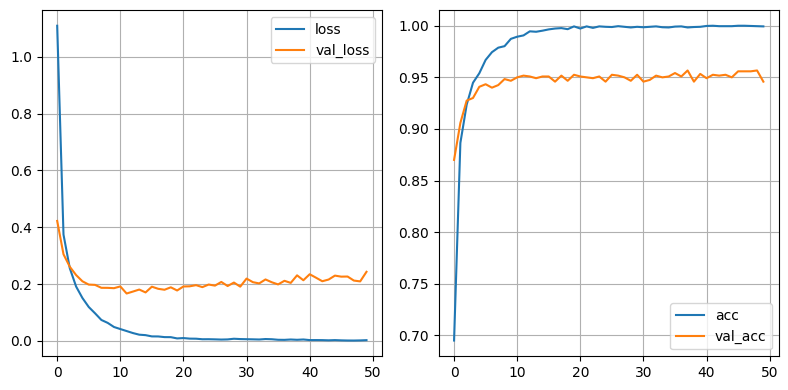

In [ ]:
# Model#5.5A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0084, 'acc': 0.9969, 'val_loss': 0.2172, 'val_acc': 0.9567}


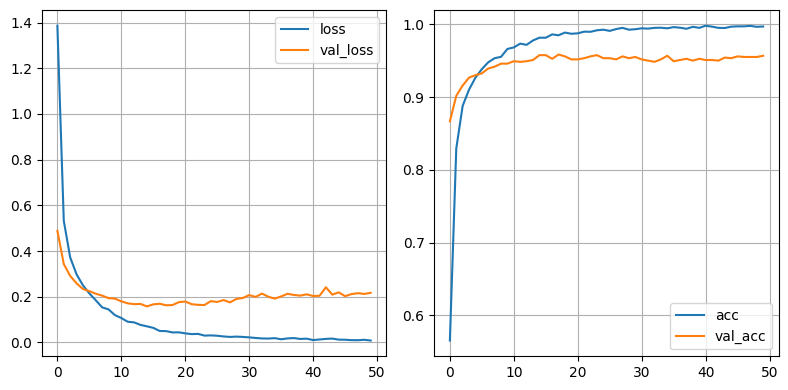

In [ ]:
# Model#5.5B
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

# Practice - Question 1 of 2

## Q1a

Modify the code of Model#2 (2 hidden layers, 512 neurons in each hidden layer) to each of the following models with different hidden layers and/or dropout rates:

- Model#5.5C: 2 hidden layers, each containing 512 neurons; dropout rate 0.75
- Model#5.5D: 2 hidden layers, each containing 1024 neurons; dropout rate 0.75
- Model#5.5E: 3 hidden layers, each containing 512 neurons; dropout rate 0.75

{'loss': 0.0863, 'acc': 0.9729, 'val_loss': 0.1974, 'val_acc': 0.95}


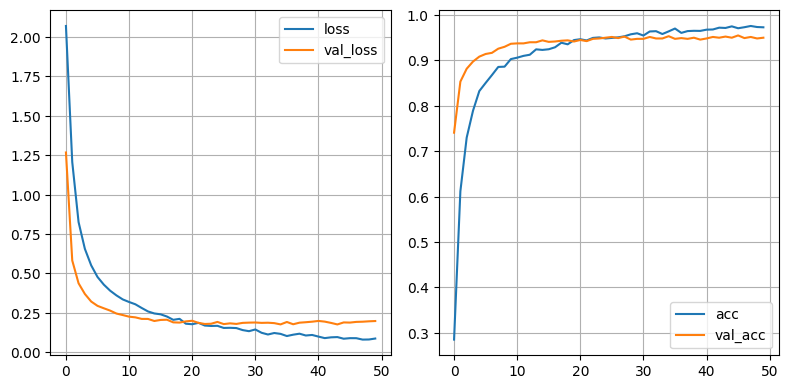

In [ ]:
# Model#5.5C

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0425, 'acc': 0.9881, 'val_loss': 0.1827, 'val_acc': 0.9583}


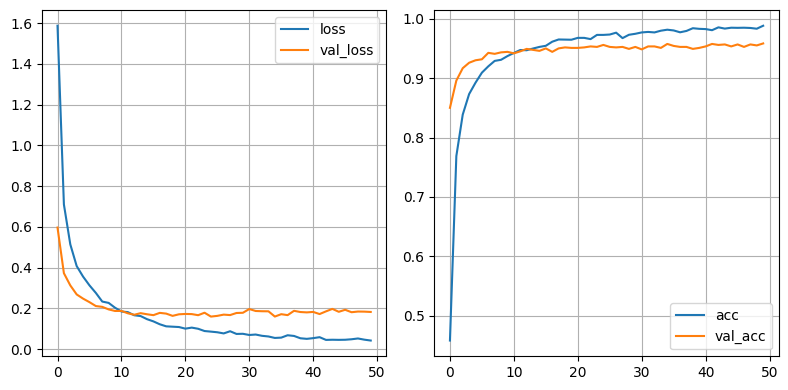

In [ ]:
# Model#5.5D

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


{'loss': 0.1527, 'acc': 0.9542, 'val_loss': 0.2272, 'val_acc': 0.9475}


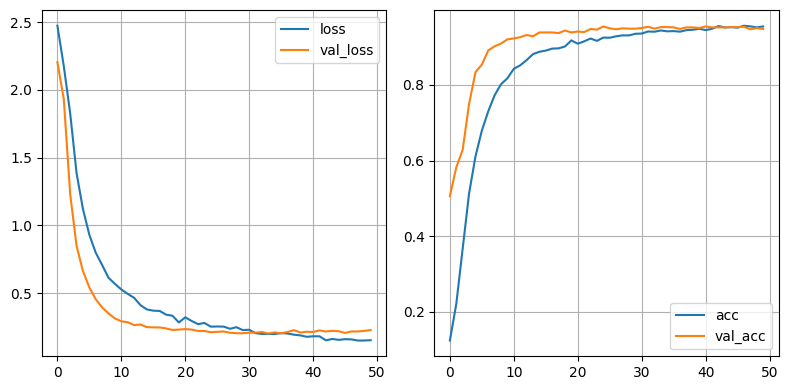

In [ ]:
# Model#5.5E

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


## Q1b

A template table is provided below.

Model | Hidden layers | Neurons in a hidden layer | Dropout rate | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:|:-:
#5.5A | 2 | 512 | 0.25 | 0.2187 | 0.9525 | Moderate
#5.5B | 2 | 512 | 0.5 | 0.2098 | 0.9558 | Moderate
#5.5C | 2 | 512 | 0.75 |  ? | ? | ?
#5.5D | 2 | 1024 | 0.75 |  ? | ? | ?
#5.5E | 3 | 512 | 0.75 |  ? | ? | ?

Make a copy of the table. Referring to the execution outputs, fill in the validation results and overfitting status in the table.

Solution:


<div class='alert alert-warning' role='alert'><b>Model | Hidden layers | Neurons in a hidden layer | Dropout rate | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:|:-:
#5.5A | 2 | 512 | 0.25 | 0.2187 | 0.9525 | Moderate
#5.5B | 2 | 512 | 0.5 | 0.2098 | 0.9558 | Moderate
#5.5C | 2 | 512 | 0.75 | 0.1974 | 0.95 | Slightly
#5.5D | 2 | 1024 | 0.75 |  0.1827 | 0.9583 | Moderate
#5.5E | 3 | 512 | 0.75 |  0.2272 | 0.9475 | Slightly</b></div>


## Q1c

Referring to the results in Q1b, select the best model out of Model#5.5A/B/C/D/E with the lowest validation loss. (Note that we consider only the validation loss for simplicity. In practice, we may consider one or more metrics, the business goal, whether we are improving the model or selecting the accepted model, and other factors.)

Write code to retrain the best model and evaluate it using the test set. You may refer to code that retrains Model#4 at the end of the *Backgrounds and Utilities > Previous models* section.

In [7]:
# Model#5.5D

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))

print("Evaluation of retrained model",
      model.evaluate(X_test, y_test, verbose=0))


{'loss': 0.0425, 'acc': 0.9881, 'val_loss': 0.1827, 'val_acc': 0.9583}
Evaluation of retrained model [0.20473532378673553, 0.9490000009536743]


## &#x2766;

# Batch normalization

Batch normalization, or batch norm, normalizes batches of data in a layer of neurons to achieve regularization and other desirable effects.

Three models with different numbers of neurons are examined below, with batch norm applied after activation in the hidden layers. The summary of results, code and execution outputs are shown below.

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#6.5A | 2 | 512 | 0.1882 | 0.9542 | Moderate
#6.5B | 2 | 1024 | 0.1853 | 0.9533 | Moderate
#6.5C | 2 | 2048 | 0.2066 | 0.9517 | Slight

{'loss': 0.0002, 'acc': 1.0, 'val_loss': 0.188, 'val_acc': 0.9542}


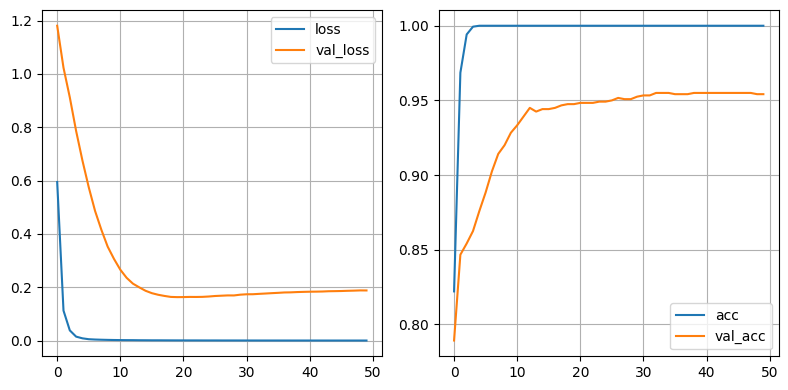

In [ ]:
# Model#6.5A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.1861, 'val_acc': 0.9533}


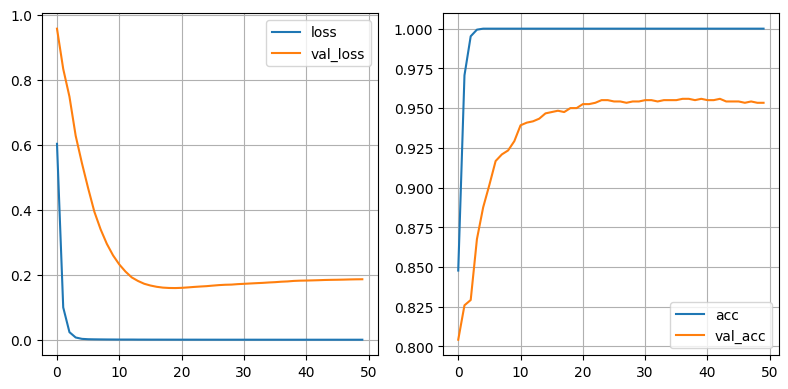

In [ ]:
# Model#6.5B
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0, 'acc': 1.0, 'val_loss': 0.2093, 'val_acc': 0.955}


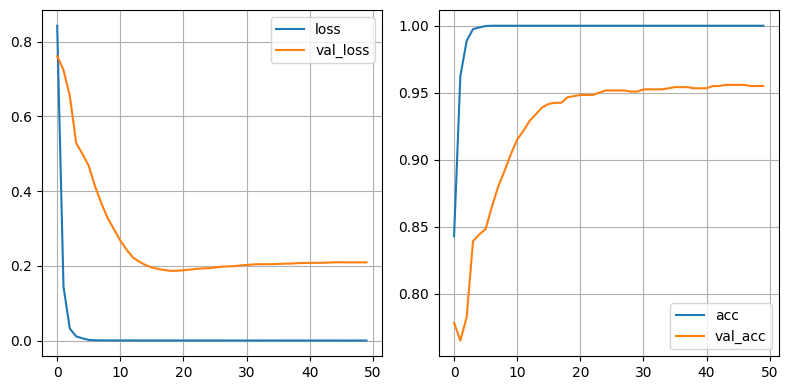

In [ ]:
# Model#6.5C
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

# Practice - Question 2 of 2

## Q2a

Modify the code of Model#6.5A/B/C to use 3 hidden layers instead of 2 hidden layers as follows:

- Model#6.5D: 3 hidden layers, each containing 512 neurons
- Model#6.5E: 3 hidden layers, each containing 1024 neurons
- Model#6.5F: 3 hidden layers, each containing 2048 neurons

Remember to apply batch norm to each hidden layer after the activation.

{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.1921, 'val_acc': 0.9525}


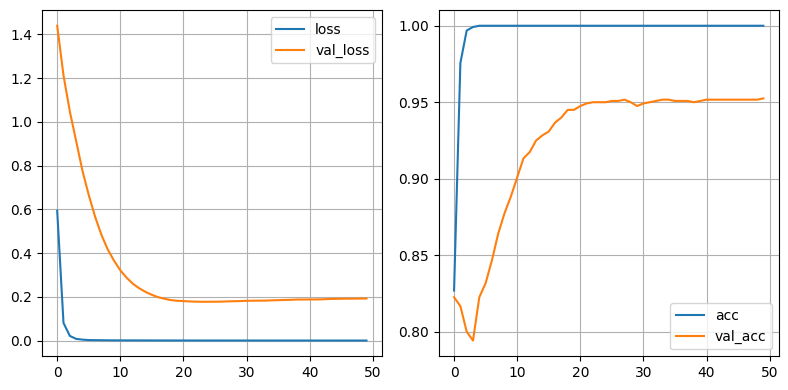

In [ ]:
# Model#6.5D

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


{'loss': 0.0, 'acc': 1.0, 'val_loss': 0.182, 'val_acc': 0.9558}


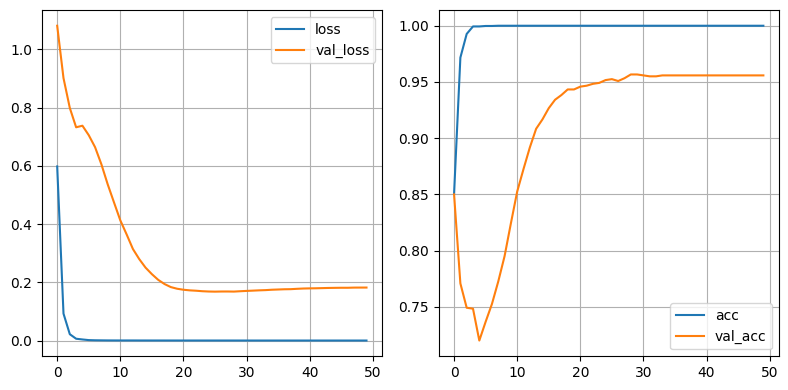

In [ ]:
# Model#6.5E

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


{'loss': 0.0, 'acc': 1.0, 'val_loss': 0.1815, 'val_acc': 0.9642}


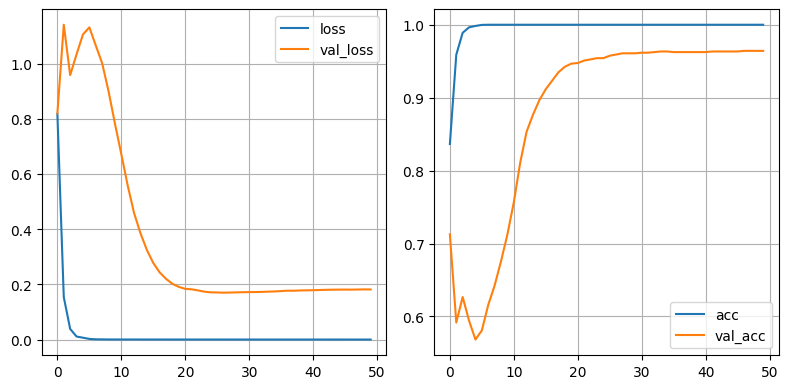

In [ ]:
# Model#6.5F

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2048, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


## Q2b

A template table is provided below.

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#6.5A | 2 | 512 | 0.1882 | 0.9542 | Moderate
#6.5B | 2 | 1024 | 0.1853 | 0.9533 | Moderate
#6.5C | 2 | 2048 | 0.2066 | 0.9516 | Slight
#6.5D | 3 | 512 |  ? | ? | ?
#6.5E | 3 | 1024 |  ? | ? | ?
#6.5F | 3 | 2048 |  ? | ? | ?

Make a copy of the table. Referring to the execution outputs, fill in the validation results and overfitting status in the table.

Solution:

Model | Hidden layers | Neurons in a hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#6.5A | 2 | 512 | 0.1882 | 0.9542 | Moderate
#6.5B | 2 | 1024 | 0.1853 | 0.9533 | Moderate
#6.5C | 2 | 2048 | 0.2066 | 0.9516 | Slight
#6.5D | 3 | 512 |  0.1921 | 0.9525 | Slight
#6.5E | 3 | 1024 |  0.182 | 0.9558 | Slight
#6.5F | 3 | 2048 |  0.1815 | 0.9642 | Moderate

## Q2c

Referring to the results in Q2b, select the best model out of Model#6.5A/B/C/D/E/F with the lowest validation loss.

Write code to retrain the best model and evaluate it using the test set. You may refer to code that retrains Model#4 at the end of the *Backgrounds and Utilities > Previous models* section.

{'loss': 0.0, 'acc': 1.0, 'val_loss': 0.182, 'val_acc': 0.9558}


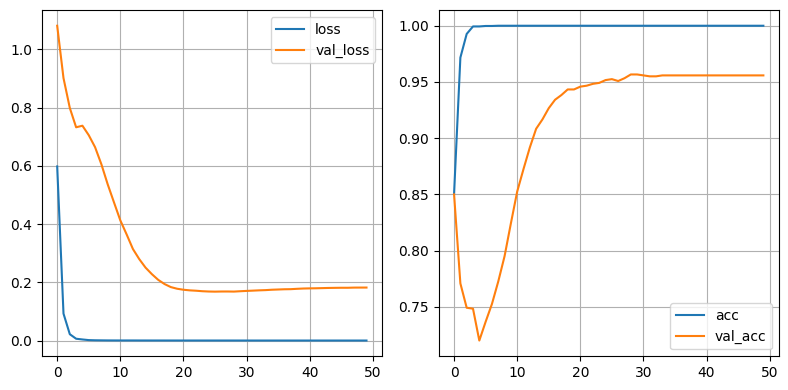

In [8]:
# Model#6.5E

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)


In [9]:
print("Evaluation of retrained model",
      model.evaluate(X_test, y_test, verbose=0))

Evaluation of retrained model [0.20542863011360168, 0.9440000057220459]


## &#x2766;

# Extras

## Dropout rates

In the previous discussion about dropout, the same dropout rate is applied to all hidden layers in a model. It is possible to apply different dropout rates to the hidden layers in a model.

### E1a

Modify Model#5.5A to use different dropout rates in the hidden layers as follows:

- Model#5.5F: dropout rate 0.25 after the first hidden layer, and dropout rate 0.75 after the second hidden layer
- Model#5.5G: dropout rate 0.75 after the first hidden layer, and dropout rate 0.25 after the second hidden layer

Referring to the execution outputs, tabulate the validation results and overfitting status.

## Batch norm before activation

In the previous discussion about batch norm, batch norm is applied after activation. An alternative is to apply batch norm before activation. There is no general agreement on whether it is better to apply batch norm before or after activation.

The following Model#6.5A2 shows how to apply batch norm before activation. Note that the `Dense(512)` layer has no `activation` argument, followed by the `BatchNormalization()` layer, then followed by the `Activation(activation="relu")` layer.

{'loss': 0.0002, 'acc': 1.0, 'val_loss': 0.1627, 'val_acc': 0.9525}


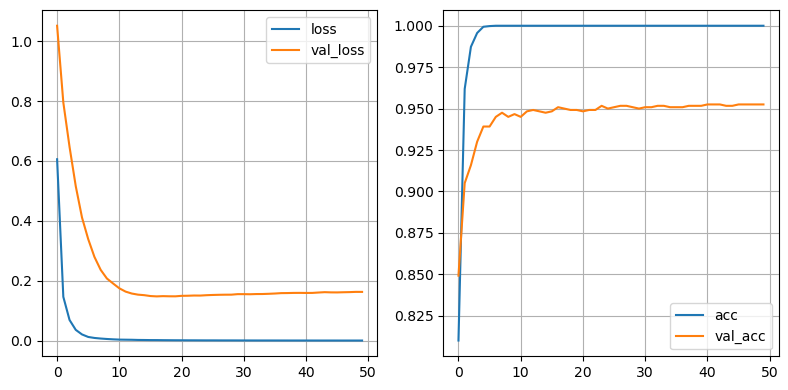

In [ ]:
# Model#6.5A2
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation(activation="relu"),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation(activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

### E1b

Modify Model#6.5B to apply batch norm before activation.

## Solutions to extra exercises

### E1a

The results are tabulated below, followed by the code and execution outputs.

Model | Dropout in 1st hidden layer | Dropout in 2nd hidden layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#5.5A | 0.25 | 0.25 | 0.2187 | 0.9525 | Moderate
#5.5F | 0.25 | 0.75 | 0.1933 | 0.9583 | Slight
#5.5G | 0.75 | 0.25 | 0.1915 | 0.9575 | No

{'loss': 0.0061, 'acc': 0.9983, 'val_loss': 0.1933, 'val_acc': 0.9583}


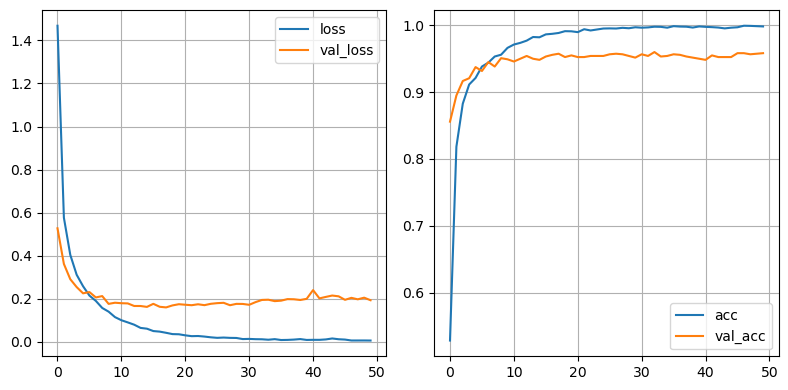

In [ ]:
# Solution

# Model#5.5F
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0442, 'acc': 0.9856, 'val_loss': 0.1915, 'val_acc': 0.9575}


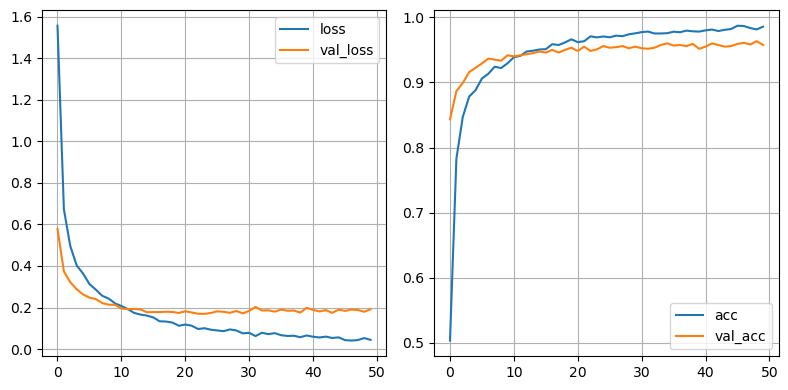

In [ ]:
# Solution

# Model#5.5G
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.75),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

### E1b

{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.161, 'val_acc': 0.9608}


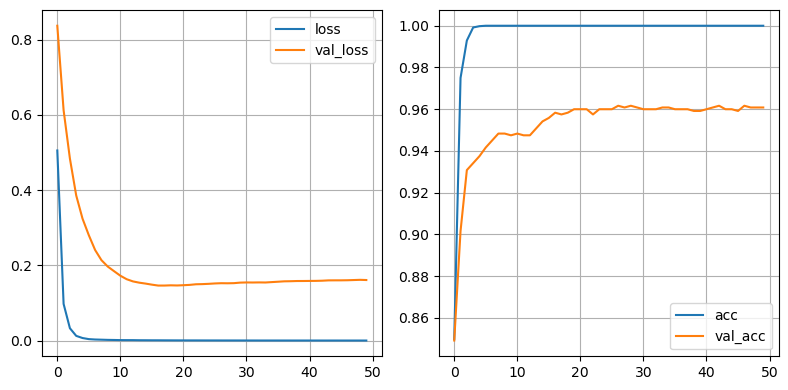

In [ ]:
# Solution

# Model#6.5B2
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.Activation(activation="relu"),
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.Activation(activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train)
print(history_final_values(history))
plot_history(history)

## &#x2766;